## iFood CRM Data Analyst Case - 
Autor: Natália Antunes

Elaborado em: Março/21

## Dados da companhia
Empresa consolidada no ramo de varejo alimentício fornecendo atendimento para aproximadamente 1 MM de clientes/ano. Os produtos vendidos se distribuem em 5 principais categorias de produtos: Vinhos, carnes raras, frutas exoticas, peixes e doces. Esses produtos podem ser divididos em "Gold" ou regular.
Atualmente existem três canais de venda: lojas físicas, catálogos e online.

## Case
Embora nos últimos 3 anos a empresa teve resultado financeiro saudável, as perspectivas para os próximos anos não são boas. O objetivo deste case é auxiliar o departamento de Marketing nas tomadas de decisões e adoção novas estratégias para contrariar as baixas previsões para os próximos 3 anos.
Para que a próxima campanha de marketing, que será realizada no próximo mês, possa converter o maior lucro foi solicitada a construção de um modelo preditivo.
Esse modelo auxiliará no direcionamento estratégico de clientes  que tenham uma maior chance de aquisição do novo Gadget, tornando a próxima campanha altamente lucrativa. Além disso, espera-se maximizar o lucro da campanha e o CMO está interessado em estudar as características dos clientes que desejam comprar o gadget.

## Campanha Piloto
Foi realizado uma campanha piloto selecionando aleatoriamente 2.240 clientes. Esses clientes foram contatados por telefone para a aquisição do gadget. A campanha teve uma taxa de sucesso de 15% com custo total de 6,720MU, gerando uma receita 3,674MU. 



## Pré-procesamento da base

In [1]:
## Carregando as bibliotecas/ pacotes necessários
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans
import warnings
import os
import datetime
from scipy import stats

In [2]:
## Carregando o data frame
base= pd.read_csv('C:/Users/natya/Documents/Teste_Ifood/ml_project1_data.csv', sep=",")

In [3]:
## Cabeçalho do data frame 
base.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
## Criando uma coluna apenas com mês/ano com início do registro cliente na companhia
base['Customer_MY']=pd.to_datetime(base['Dt_Customer']).dt.to_period('M')

In [6]:
## Criando uma coluna com o gasto total do cliente nas 5 categorias de produtos
base['MntTotal'] = base[['MntWines' ,'MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts']].sum(axis=1)

In [7]:
## Criando uma coluna com total de compras do cliente nos 3 canais de venda (online, catalogo e loja)
base['NumTotal'] = base[["NumWebPurchases","NumCatalogPurchases","NumStorePurchases"]].sum(axis=1)

In [8]:
## Criando uma coluna definindo se na casa existe não adultos.

def f(row):
    if row['Kidhome'] >0:
        val = 1
    elif row['Teenhome'] > 0:
        val = 1
    else:
        val = 0
    return val

In [9]:
base['NoAdults'] = base.apply(f, axis=1)

## Visualização dos Dados

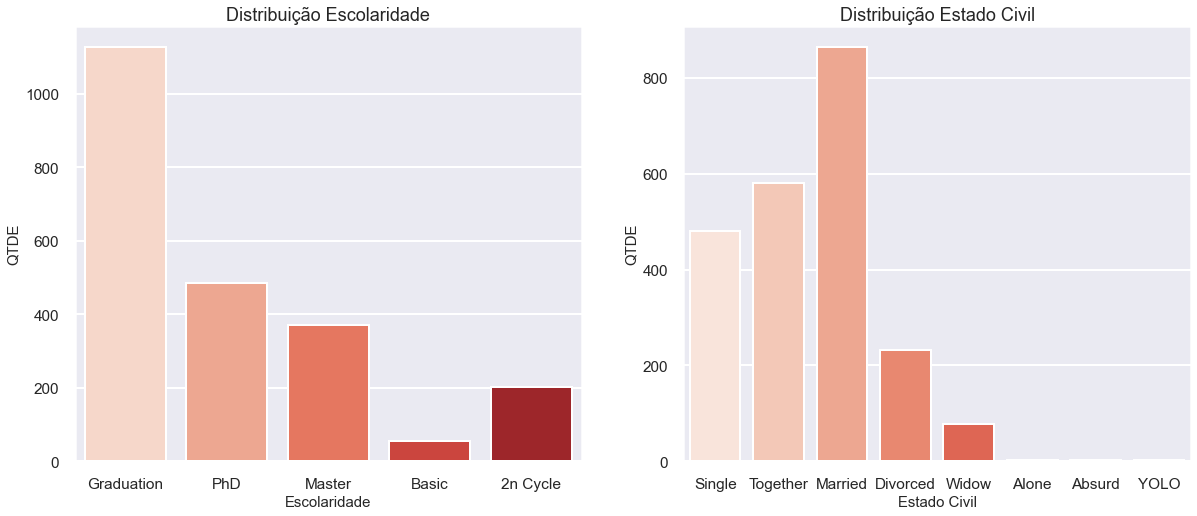

In [10]:
## Graficos com a distribuição da Escolaridade e Estado Civil
sns.set_style("darkgrid")
sns.set_context("poster",font_scale=0.7)
plt.figure(figsize = (20, 8))

plt.subplot(121)
sns.countplot(x = 'Education' , data = base, palette="Reds")
plt.title('Distribuição Escolaridade',fontsize=18)
plt.xlabel('Escolaridade', fontsize=15)
plt.ylabel('QTDE', fontsize=15)

plt.subplot(122)
sns.countplot(x = 'Marital_Status' , data = base, palette="Reds")
plt.title('Distribuição Estado Civil',fontsize=18)
plt.xlabel('Estado Civil', fontsize=15)
plt.ylabel('QTDE', fontsize=15)
plt.show()

C:\Users\natya\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


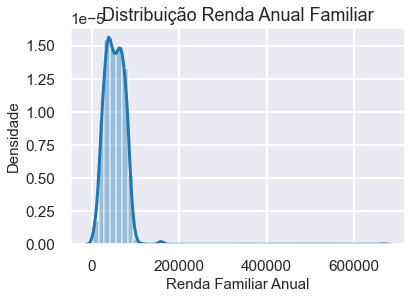

C:\Users\natya\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


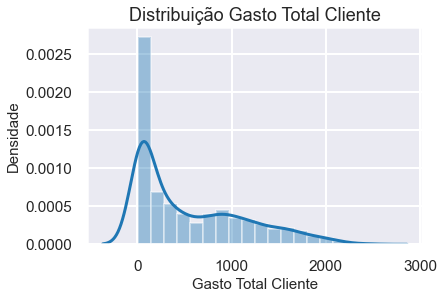

In [11]:
## Gráfico da distribuição da Renda Anual Familiar
## Indicativo outilier
sns.distplot(base["Income"])
plt.title('Distribuição Renda Anual Familiar',fontsize=18)
plt.xlabel('Renda Familiar Anual', fontsize=15)
plt.ylabel('Densidade', fontsize=15)
plt.show()

## Gráfico da distribuição do Gasto Total Cliente
sns.distplot(base["MntTotal"])
plt.title('Distribuição Gasto Total Cliente',fontsize=18)
plt.xlabel('Gasto Total Cliente', fontsize=15)
plt.ylabel('Densidade', fontsize=15)
plt.show()


In [11]:
## Estatísticas de resumo do gasto total.
## O gasto total de 50% dos clientes da amostra é inferior a 341 MU
## Gasto médio de 561 MU.
base[["MntTotal","MntWines","MntFruits","MntMeatProducts","MntFishProducts","MntSweetProducts"]].describe()

,MntTotal,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,561.776339,303.935714,26.302232,166.950000,37.525446,27.062946
std,576.613680,336.597393,39.773434,225.715373,54.628979,41.280498
min,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,23.750000,1.000000,16.000000,3.000000,1.000000
50%,341.000000,173.500000,8.000000,67.000000,12.000000,8.000000
75%,964.000000,504.250000,33.000000,232.000000,50.000000,33.000000
max,2491.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000


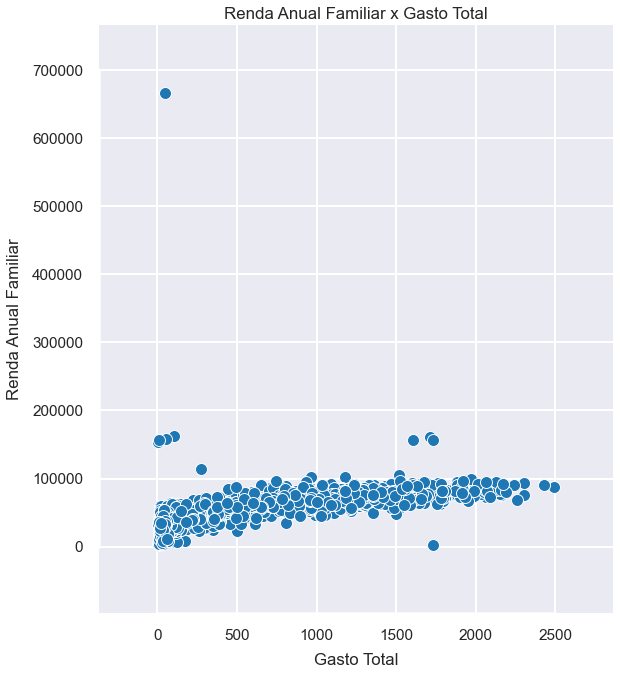

In [13]:
## Grafico relacionando a renda anual familiar do cliente versus gasto total em compras
ps=sns.relplot(x="MntTotal", y="Income",data=base)
ps.set_axis_labels("Gasto Total", "Renda Anual Familiar", labelpad=10)
ps.set(title='Renda Anual Familiar x Gasto Total')
ps.fig.set_size_inches(10, 10)
ps.ax.margins(.15)
ps.despine(trim=True)
plt.show()

## Observar outlier

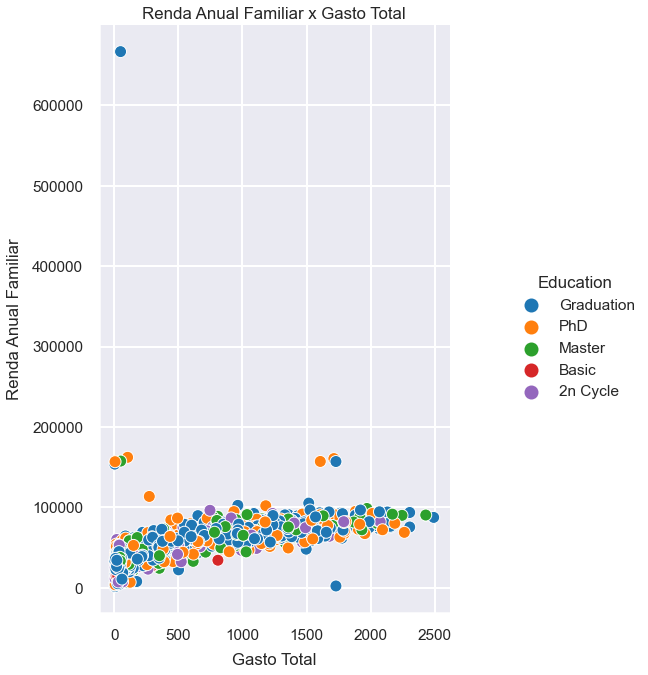

In [12]:
## Grafico relacionando a renda anual familiar do cliente versus gasto total em compras
ps=sns.relplot(x="MntTotal", y="Income", hue="Education",data=base)
ps.set_axis_labels("Gasto Total", "Renda Anual Familiar", labelpad=10)
ps.set(title='Renda Anual Familiar x Gasto Total')
ps.fig.set_size_inches(10, 10)
plt.show()

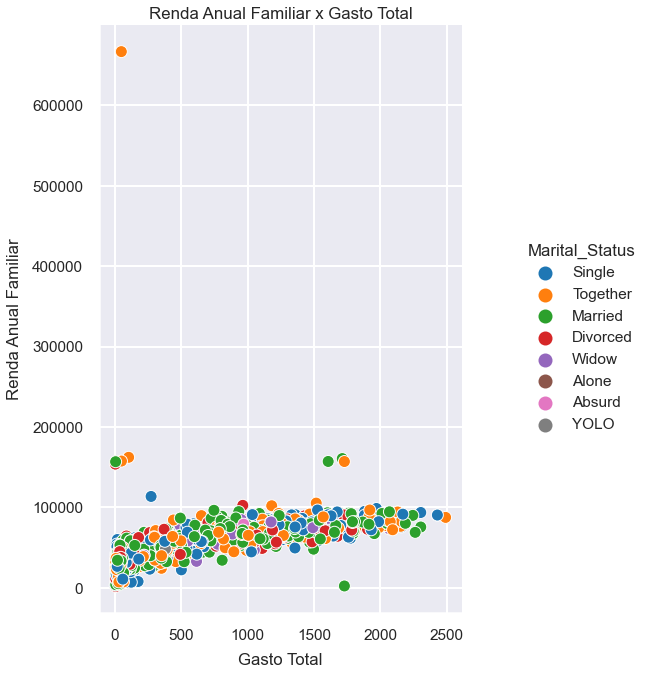

In [13]:
## Grafico relacionando a renda anual familiar do cliente versus gasto total em compras
ps=sns.relplot(x="MntTotal", y="Income",hue="Marital_Status",data=base)
ps.set_axis_labels("Gasto Total", "Renda Anual Familiar", labelpad=10)
ps.set(title='Renda Anual Familiar x Gasto Total')
ps.fig.set_size_inches(10, 10)
plt.show()

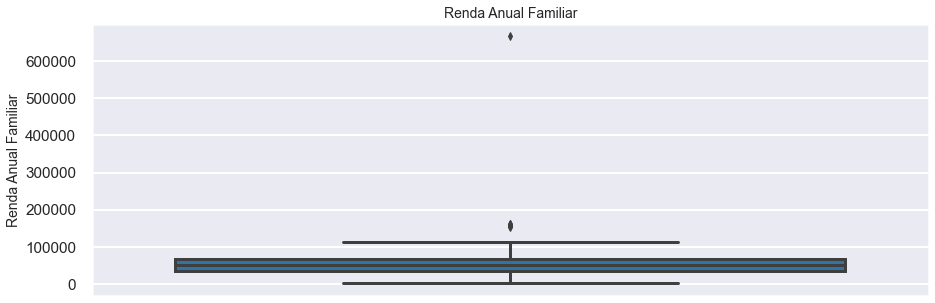

In [14]:
## Grafico relacionando a renda anual familiar do cliente versus gasto total em compras
plt.figure(figsize = (15, 5))
sns.boxplot(y="Income", data=base)
plt.title('Renda Anual Familiar',fontsize=14)
plt.ylabel('Renda Anual Familiar', fontsize=14)
plt.show()

In [15]:
## Detectando Outlier utilizando o Z escore
z = np.abs(stats.zscore(base['Income'].fillna(0)))
outlier=np.where(z > 3)

base.loc[outlier]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_MY,MntTotal,NumTotal,NoAdults
164,8475,1973,PhD,Married,157243.0,0,1,2014-03-01,98,20,...,0,0,0,3,11,0,2014-03,1607,22,1
617,1503,1976,PhD,Together,162397.0,1,1,2013-06-03,31,85,...,0,0,0,3,11,0,2013-06,105,1,1
655,5555,1975,Graduation,Divorced,153924.0,0,0,2014-02-07,81,1,...,0,0,0,3,11,0,2014-02,5,0,0
687,1501,1982,PhD,Married,160803.0,0,0,2012-08-04,21,55,...,0,0,0,3,11,0,2012-08,1713,29,0
1300,5336,1971,Master,Together,157733.0,1,0,2013-06-04,37,39,...,0,0,0,3,11,0,2013-06,51,2,1
1653,4931,1977,Graduation,Together,157146.0,0,0,2013-04-29,13,1,...,0,0,0,3,11,0,2013-04,1729,28,0
2132,11181,1949,PhD,Married,156924.0,0,0,2013-08-29,85,2,...,0,0,0,3,11,0,2013-08,7,0,0
2233,9432,1977,Graduation,Together,666666.0,1,0,2013-06-02,23,9,...,0,0,0,3,11,0,2013-06,50,7,1


In [16]:
## Removendo os outliers da base
# Analisando a base dos outliers é possível perceber que o cliente indexado na linha 2233 possui
# renda anual familiar ainda mais destoante dos demais.
#df=base.drop(base.index[outlier])
df=base.drop(base.index[2233])


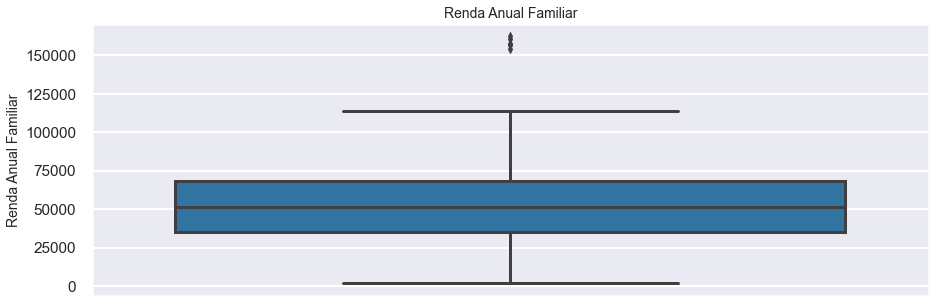

In [17]:
## Box plot sem o outlier
plt.figure(figsize = (15, 5))
sns.boxplot(y="Income", data=df)
plt.title('Renda Anual Familiar',fontsize=14)
plt.ylabel('Renda Anual Familiar', fontsize=14)
plt.show()

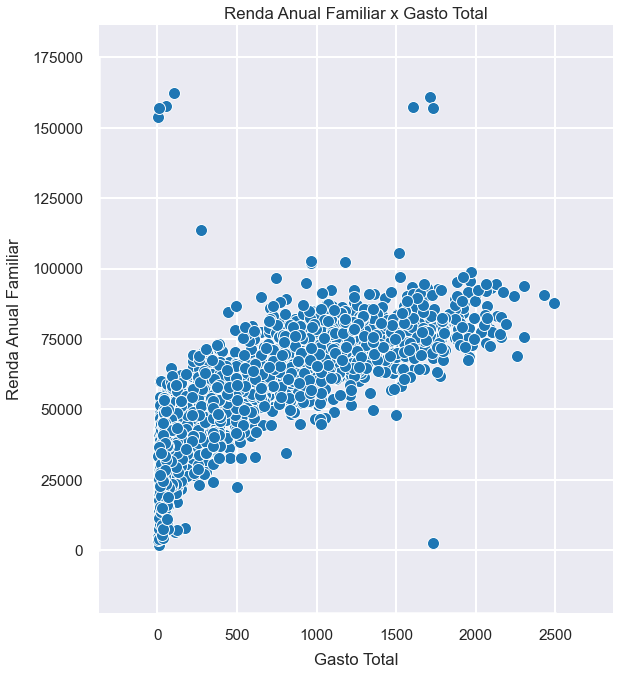

In [18]:
## Grafico relacionando a renda anual familiar do cliente versus gasto total em compras
ps=sns.relplot(x="MntTotal", y="Income",data=df)
ps.set_axis_labels("Gasto Total", "Renda Anual Familiar", labelpad=10)
ps.set(title='Renda Anual Familiar x Gasto Total')
ps.fig.set_size_inches(10, 10)
ps.ax.margins(.15)
ps.despine(trim=True)
plt.show()
## Observar outlier

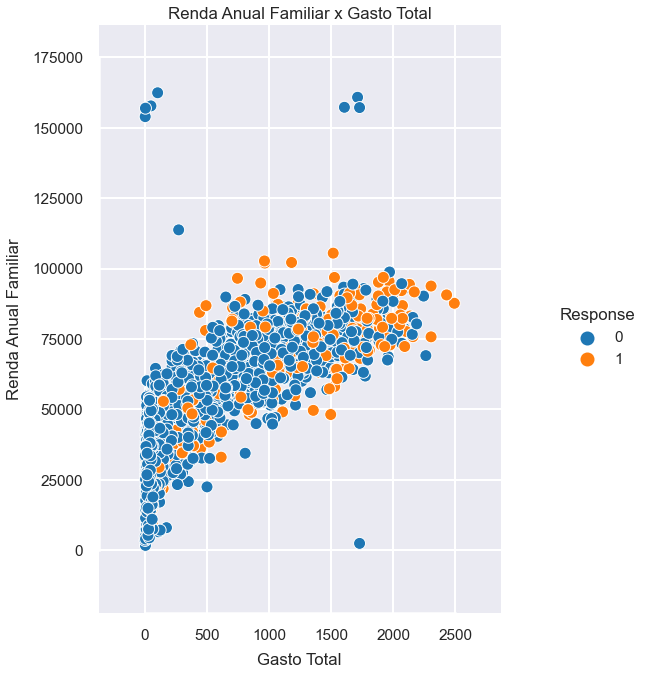

In [19]:
## Grafico relacionando a renda anual familiar do cliente versus gasto total em compras
ps=sns.relplot(x="MntTotal", y="Income",hue="Response",data=df)
ps.set_axis_labels("Gasto Total", "Renda Anual Familiar", labelpad=10)
ps.set(title='Renda Anual Familiar x Gasto Total')
ps.fig.set_size_inches(10, 10)
ps.ax.margins(.15)
ps.despine(trim=True)
plt.show()

In [20]:
## Compra Total dos Clientes da amostra nos três canais de venda da empresa
df[["NumTotal","NumWebPurchases","NumCatalogPurchases","NumStorePurchases"]].describe() 

,NumTotal,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
count,2239.000000,2239.000000,2239.000000,2239.000000
mean,12.539527,4.085306,2.662796,5.791425
std,7.206400,2.779240,2.923542,3.251149
min,0.000000,0.000000,0.000000,0.000000
25%,6.000000,2.000000,0.000000,3.000000
50%,12.000000,4.000000,2.000000,5.000000
75%,18.000000,6.000000,4.000000,8.000000
max,32.000000,27.000000,28.000000,13.000000


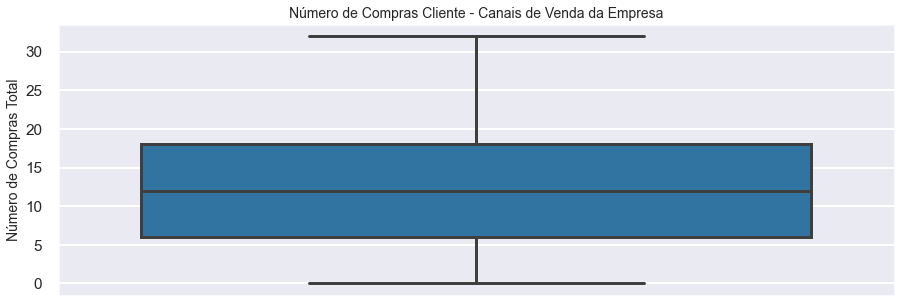

In [21]:
## Plot Número de Compras Cliente
plt.figure(figsize = (15, 5))
sns.boxplot(y="NumTotal", data=df)
plt.title('Número de Compras Cliente - Canais de Venda da Empresa',fontsize=14)
plt.ylabel('Número de Compras Total', fontsize=14)
plt.show()

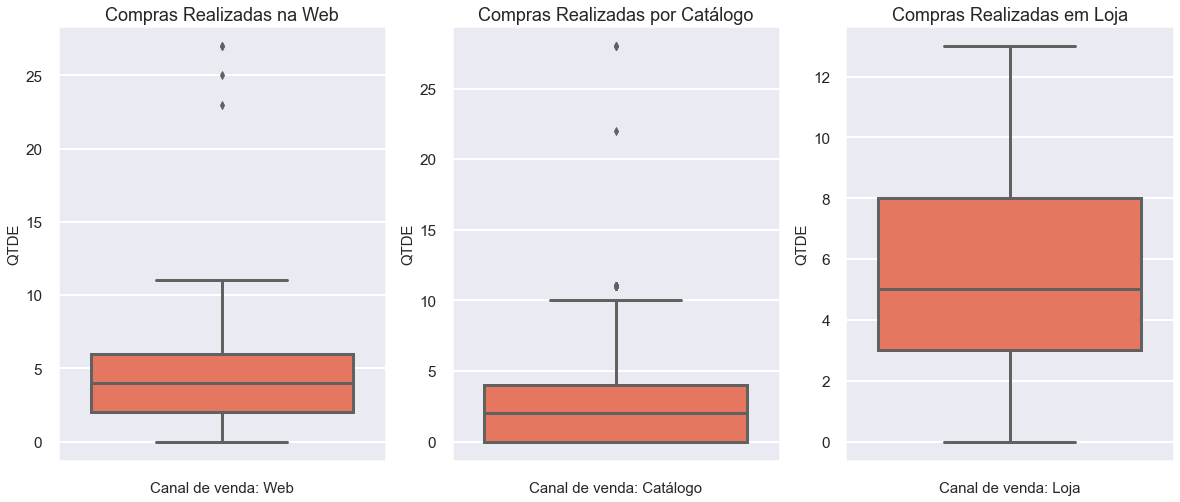

In [22]:
## Plot Variáveis Relacionadas aos Canais de Venda da Empresa
plt.figure(figsize = (20, 8))

plt.subplot(131)
sns.boxplot(y= 'NumWebPurchases' , data = df, palette="Reds")
plt.title('Compras Realizadas na Web',fontsize=18)
plt.xlabel('Canal de venda: Web', fontsize=15)
plt.ylabel('QTDE', fontsize=15)

plt.subplot(132)
sns.boxplot(y= 'NumCatalogPurchases' , data = df, palette="Reds")
plt.title('Compras Realizadas por Catálogo',fontsize=18)
plt.xlabel('Canal de venda: Catálogo', fontsize=15)
plt.ylabel('QTDE', fontsize=15)

plt.subplot(133)
sns.boxplot(y= 'NumStorePurchases' , data = df, palette="Reds")
plt.title('Compras Realizadas em Loja',fontsize=18)
plt.xlabel('Canal de venda: Loja', fontsize=15)
plt.ylabel('QTDE', fontsize=15)


plt.show()
## Embora os gráficos estejam em escalas diferentes, percebe-se que intra grupo há uma maior variabilidade nas compras
## realizadas em loja.

C:\Users\natya\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


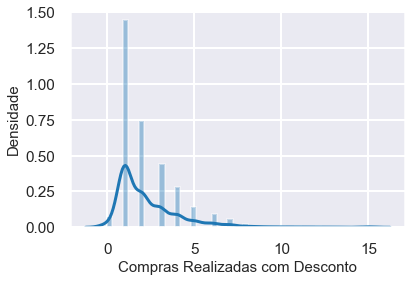

In [23]:
## Densidade 
sns.distplot(df['NumDealsPurchases'])
plt.xlabel('Compras Realizadas com Desconto', fontsize=15)
plt.ylabel('Densidade', fontsize=15)

plt.show()

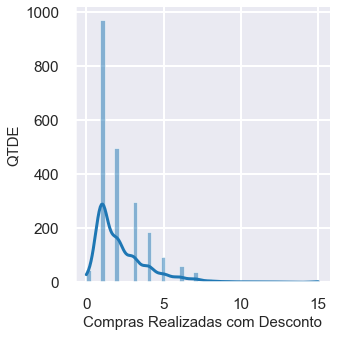

In [26]:
## Compras Realizadas com Desconto
sns.displot(data=df, x="NumDealsPurchases", kde=True)
plt.xlabel('Compras Realizadas com Desconto', fontsize=15)
plt.ylabel('QTDE', fontsize=15)

plt.show()

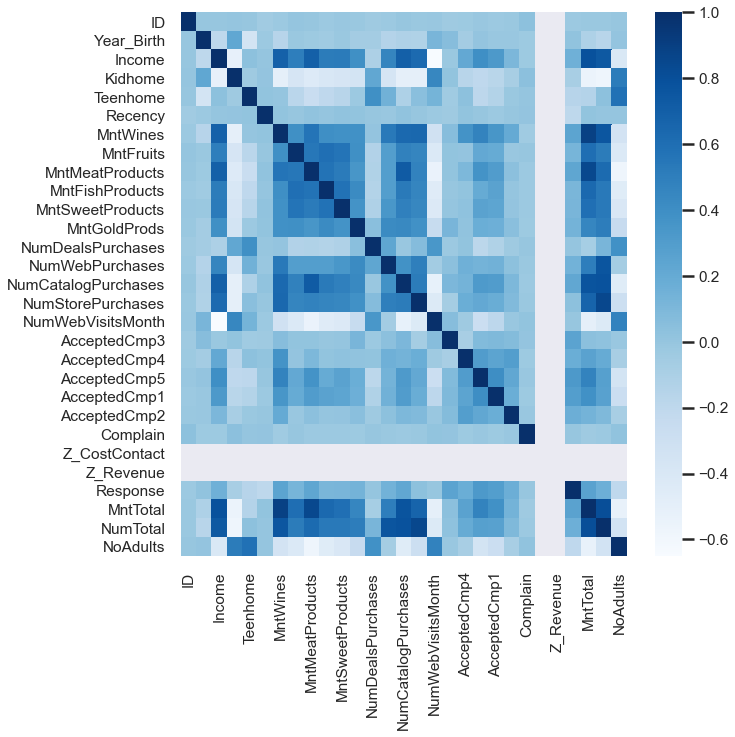

In [29]:
# visualizar correlação entre as variáveis
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), cmap='Blues')
plt.show()
##Visualização poluída.

## Análise de Correspondência

No intuito de agregar valor às análises, será realizada a Análise de Correspondência, uma técnica de estatística multivariada para variáveis qualitativas. Ela visa avaliar a relação entre linhas e colunas de um determinado conjunto de dados.

In [30]:
from scipy.stats import chi2_contingency
import prince

In [31]:
## Primeiro passo: Criar a Tabela cruzada das variáveis Educação e Target.
cross=pd.crosstab(df.Education, df.Response)
cross
vetor = cross.values
initials=['2n Cycle','Basic','Graduation','Master','PhD']
chars=["Não Aceitou oferta", "Aceitou a Oferta"]

In [34]:
## Criar a matriz de correspondência
grandTotal = np.sum(vetor)
correspondenceMatrix = np.divide(vetor,grandTotal)

rowTotals = np.sum(correspondenceMatrix, axis=1)
columnTotals = np.sum(correspondenceMatrix, axis=0)
independenceModel = np.outer(rowTotals, columnTotals)
 

# Estatística Qui-Quadrado
statistic, prob, dof, ex = chi2_contingency(cross)
print(statistic)
print(np.round(prob, decimals=2))

23.0357983749255
0.0


In [35]:
# Normalizando a matriz de correspondência
norm_correspondenceMatrix = np.divide(correspondenceMatrix,rowTotals[:, None])
 
chiSquaredDistances = np.zeros((correspondenceMatrix.shape[0],correspondenceMatrix.shape[0]))
 
norm_columnTotals = np.sum(norm_correspondenceMatrix, axis=0)
for row in range(correspondenceMatrix.shape[0]):
    chiSquaredDistances[row]=np.sqrt(np.sum(np.square(norm_correspondenceMatrix
                                                        -norm_correspondenceMatrix[row])/columnTotals, axis=1))
# Save distances to the DataFrame
dfchiSquaredDistances = pd.DataFrame(data=np.round(chiSquaredDistances*100).astype(int))

correspondenceMatrix

array([[0.08083966, 0.00982582],
       [0.02322465, 0.00089326],
       [0.43501563, 0.06788745],
       [0.13979455, 0.02545779],
       [0.17195176, 0.04510942]])

In [36]:
## Padronizando os Resíduoss
standardizedResiduals = np.divide((correspondenceMatrix-independenceModel),np.sqrt(independenceModel))
u,s,vh = np.linalg.svd(standardizedResiduals, full_matrices=False)

deltaR = np.diag(np.divide(1.0,np.sqrt(rowTotals)))
rowScores=np.dot(np.dot(deltaR,u),np.diag(s))
dfFirstTwoComponents = pd.DataFrame(data=[l[0:2] for l in rowScores], columns=['X', 'Y'], index=initials)
print(dfFirstTwoComponents)

                   X             Y
2n Cycle   -0.114521 -5.911783e-17
Basic      -0.314761 -6.049965e-17
Graduation -0.039810 -1.198849e-16
Master      0.013699  2.404096e-17
PhD         0.164614 -9.872814e-17


In [41]:
## Cálculo da Componente Principal
ca = prince.CA(
    n_components=2,
    n_iter=3,
    copy=True,
    check_input=True,
    engine='auto',
    random_state=42)

cross.columns.rename('chars', inplace=True)
cross.index.rename('initials', inplace=True)

ca = ca.fit(cross)

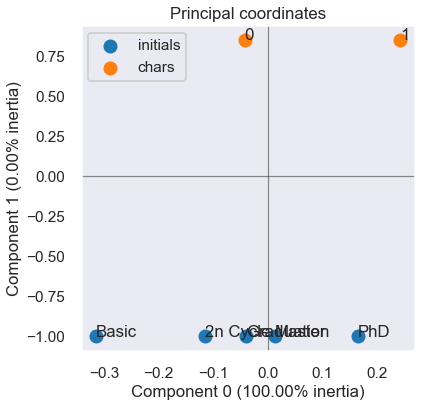

In [42]:
ca.plot_coordinates(cross)
plt.show()

A análise não atingiu seu objetivo principal, entretanto Análise de Correspondência é uma excelente técnica multivariada para a
análise de variáveis categóricas. Oportunamente vale a pena investir nesse tipo de análise adicionando mais categorias.
Poderíamos verificar, por exemplo, se juntos Estado Civil e Grau Educacional estão associados ao aceite ou não à oferta da última campanha.

## Análise de Agrupamento - Cluster

In [43]:
## Carregando bibliotecas necessárias
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster import hierarchy


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2239 entries, 0 to 2239
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype    
---  ------               --------------  -----    
 0   ID                   2239 non-null   int64    
 1   Year_Birth           2239 non-null   int64    
 2   Education            2239 non-null   object   
 3   Marital_Status       2239 non-null   object   
 4   Income               2215 non-null   float64  
 5   Kidhome              2239 non-null   int64    
 6   Teenhome             2239 non-null   int64    
 7   Dt_Customer          2239 non-null   object   
 8   Recency              2239 non-null   int64    
 9   MntWines             2239 non-null   int64    
 10  MntFruits            2239 non-null   int64    
 11  MntMeatProducts      2239 non-null   int64    
 12  MntFishProducts      2239 non-null   int64    
 13  MntSweetProducts     2239 non-null   int64    
 14  MntGoldProds         2239 non-null   int64    
 15  NumD

In [45]:
## Guardando a vaariável resposta para utilizarmos em momento oportuno
target=df['Response']

In [46]:
df.drop(['ID','Year_Birth','Dt_Customer','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts',
        'AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','AcceptedCmp1','AcceptedCmp2','Z_CostContact','Z_Revenue',
         'Customer_MY','NumWebPurchases','NumCatalogPurchases',
         'NumStorePurchases','Kidhome','Teenhome','Education','Marital_Status','NoAdults','Complain','Response'],
         axis=1,inplace=True)   
df=df.replace(np.nan, 0)

In [47]:
## Dataframe apenas com as variáveis qualitativas
clst_df=df

In [48]:
clst_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2239 entries, 0 to 2239
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Income             2239 non-null   float64
 1   Recency            2239 non-null   int64  
 2   MntGoldProds       2239 non-null   int64  
 3   NumDealsPurchases  2239 non-null   int64  
 4   NumWebVisitsMonth  2239 non-null   int64  
 5   MntTotal           2239 non-null   int64  
 6   NumTotal           2239 non-null   int64  
dtypes: float64(1), int64(6)
memory usage: 139.9 KB


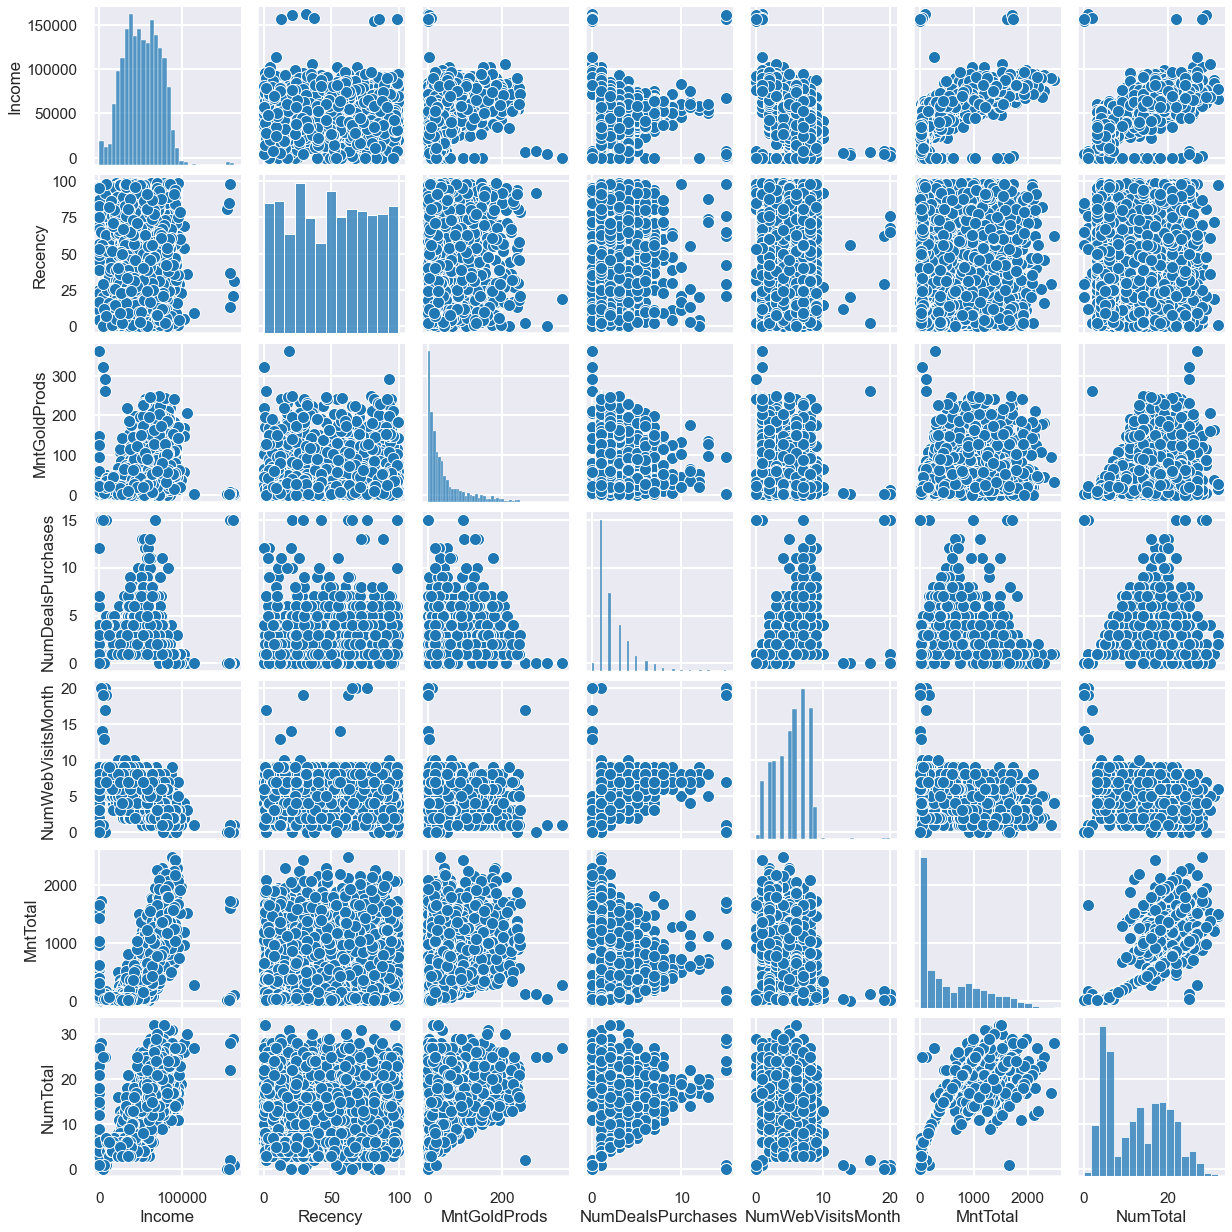

In [49]:
## Pairplot das variáveis do dataset que será realizado o cluster
sns.pairplot(clst_df)
plt.show()

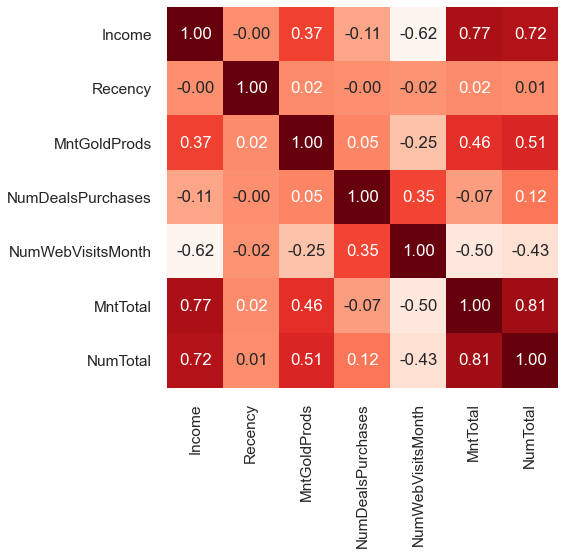

In [50]:
## Plot Correlação variáveis dataset
plt.figure(figsize=(7, 7))
corr = np.corrcoef(clst_df.values, rowvar=False)
sns.heatmap(corr, annot=True, cmap='Reds', fmt='.2f', cbar=False, xticklabels=df.columns, yticklabels=df.columns)
plt.show()

## Agrupamento utilizando Dendograma

In [51]:
df_scaled = clst_df.copy()
df_scaled.iloc[:, :] = StandardScaler().fit_transform(clst_df)

In [52]:
n_clusters = 3
cluster = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
groups = cluster.fit_predict(clst_df)
parametros=cluster.get_params(deep=True)

In [53]:
groups

array([0, 1, 0, ..., 0, 0, 1], dtype=int64)

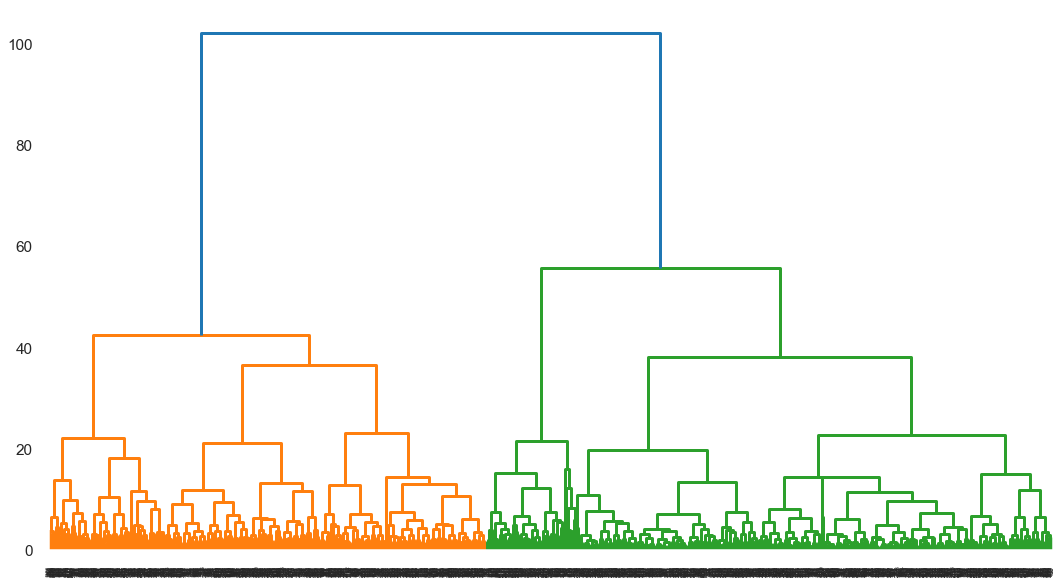

In [54]:
Z = hierarchy.linkage(df_scaled, 'ward')
plt.figure(figsize=(18, 10))
plt.grid(axis='y')
dn = hierarchy.dendrogram(Z)

In [55]:
X=clst_df.iloc[:, [0, 6]].values

In [56]:
labels = groups

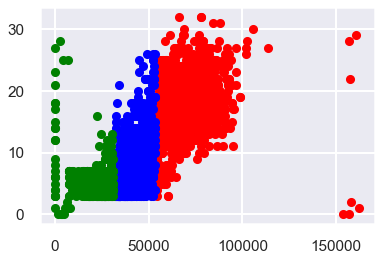

In [57]:
plt.scatter(X[labels==0, 0], X[labels==0, 1], s=50, marker='o', color='red')
plt.scatter(X[labels==1, 0], X[labels==1, 1], s=50, marker='o', color='blue')
plt.scatter(X[labels==2, 0], X[labels==2, 1], s=50, marker='o', color='green')
plt.scatter(X[labels==3, 0], X[labels==3, 1], s=50, marker='o', color='purple')
plt.show()

## Agrupamento - K-médias

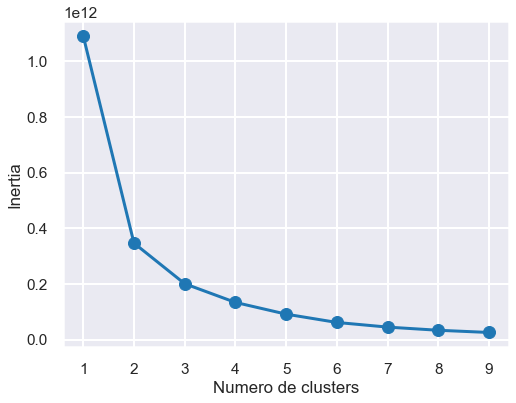

In [58]:
inertias = []
for k in np.arange(1, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(clst_df)
    inertias.append(kmeans.inertia_)

# Plotando o gráfico do Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(np.arange(1, 10), inertias, '-o')
plt.xlabel('Numero de clusters')
plt.ylabel('Inertia');

In [59]:
## Definição do número de clusters
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters)

In [60]:
## Definindo novo data set e realizando o ajuste do cluster
df_scaled2 = clst_df.copy()
df_scaled2.iloc[:, :] = StandardScaler().fit_transform(clst_df)
df_scaled2['cluster'] = kmeans.fit_predict(df_scaled2)

In [61]:
## Algumas informações do ajuste
labels_ajuste=kmeans.labels_ ## Ajuste dos Labels
centr_clster=kmeans.cluster_centers_ ## Centroide
num_int=kmeans.n_iter_ ## Numero máximo de interações

In [62]:
## Agregando os clusters na base de dados original
clst_df['cluster'] = kmeans.fit_predict(df_scaled2)

In [63]:
dados = pd.concat([clst_df, target], axis=1, sort=False)

In [66]:
## Estatísticas dos Grupos do Cluster
## Income - Renda Anual Familiar
clst_in_media = dados.groupby(['cluster'], as_index=False)['Income'].mean()
clst_in_max = dados.groupby(['cluster'], as_index=False)['Income'].max()
clst_in_min = dados.groupby(['cluster'], as_index=False)['Income'].min()

## Recency - última compra
clst_ry_media = dados.groupby(['cluster'], as_index=False)['Recency'].mean()
clst_ry_max = dados.groupby(['cluster'], as_index=False)['Recency'].max()
clst_ry_min = dados.groupby(['cluster'], as_index=False)['Recency'].min()

## MntGoldProds - Gasto Produtos Gold
clst_mg_media = dados.groupby(['cluster'], as_index=False)['MntGoldProds'].mean()
clst_mg_max = dados.groupby(['cluster'], as_index=False)['MntGoldProds'].max()
clst_mg_min = dados.groupby(['cluster'], as_index=False)['MntGoldProds'].min()

## NumDealsPurchases - Compras com Desconto
clst_nd_media = dados.groupby(['cluster'], as_index=False)['NumDealsPurchases'].mean()
clst_nd_max = dados.groupby(['cluster'], as_index=False)['NumDealsPurchases'].max()
clst_nd_min = dados.groupby(['cluster'], as_index=False)['NumDealsPurchases'].min()

## NumWebVisitsMonth - Visitas Web
clst_nw_media = dados.groupby(['cluster'], as_index=False)['NumWebVisitsMonth'].mean()
clst_nw_max = dados.groupby(['cluster'], as_index=False)['NumWebVisitsMonth'].max()
clst_nw_min = dados.groupby(['cluster'], as_index=False)['NumWebVisitsMonth'].min()

## MntTotal - Gasto Total
clst_mt_media = dados.groupby(['cluster'], as_index=False)['MntTotal'].mean()
clst_mt_max = dados.groupby(['cluster'], as_index=False)['MntTotal'].max()
clst_mt_min = dados.groupby(['cluster'], as_index=False)['MntTotal'].min()

## NumTotal - Total de Compras
clst_nt_media = dados.groupby(['cluster'], as_index=False)['NumTotal'].mean()
clst_nt_max = dados.groupby(['cluster'], as_index=False)['NumTotal'].max()
clst_nt_min = dados.groupby(['cluster'], as_index=False)['NumTotal'].min()